In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# v2 removes the spectra and adds the minimization

# v3 looks at both joint and constrained wc-only chi2s and delta chi2s from the framework
# (also can potentially generate chi2s with python, since the toy data counts are saved)


In [3]:
from scipy.special import erfinv, erfcinv
from scipy.stats import chi2
from scipy.stats import poisson

def get_significance(p_value):
    
    # probability of getting a more extreme result
    #p_value = 1. - chi2.cdf(chisquare, ndf)
    
    sigma = np.sqrt(2.) * erfcinv(p_value)
    
    #if printout: print(f"chi2/ndf: {chisquare}/{ndf}, p value: {p_value}, significance: {sigma} sigma")

    return sigma

In [4]:
with open('../TLee_Np0p/joint_chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

data_counts = []
data_15_5_chi2_value = -999
data_15_5_chi2_min_value = -999
data_15_5_dchi2_value = -999

toy_15_5_counts = []
toy_15_5_15_5_chi2_values = []
toy_15_5_15_5_chi2_min_values = []
toy_15_5_15_5_dchi2_values = []

toy_1_1_counts = []
toy_1_1_15_5_chi2_values = []
toy_1_1_15_5_chi2_min_values = []
toy_1_1_15_5_dchi2_values = []

for line in lines:

    line_words = line.split()

    if line.startswith("data: "):
        data_counts = [int(x) for x in line.split()[1:]]
    elif line.startswith("data vs (15, 5) chi2 = "):
        data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        data_15_5_dchi2_value = float(line.split()[-1])

    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "fakedata:":
        toy_15_5_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        toy_15_5_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        toy_15_5_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        toy_15_5_15_5_dchi2_values.append(float(line_words[-1]))

    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "fakedata:":
        toy_1_1_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        toy_1_1_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        toy_1_1_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        toy_1_1_15_5_dchi2_values.append(float(line_words[-1]))

data_counts = np.array(data_counts)

toy_15_5_counts = np.array(toy_15_5_counts)
toy_15_5_15_5_chi2_values = np.array(toy_15_5_15_5_chi2_values)
toy_15_5_15_5_chi2_min_values = np.array(toy_15_5_15_5_chi2_min_values)
toy_15_5_15_5_dchi2_values = np.array(toy_15_5_15_5_dchi2_values)

toy_1_1_counts = np.array(toy_1_1_counts)
toy_1_1_15_5_chi2_values = np.array(toy_1_1_15_5_chi2_values)
toy_1_1_15_5_chi2_min_values = np.array(toy_1_1_15_5_chi2_min_values)
toy_1_1_15_5_dchi2_values = np.array(toy_1_1_15_5_dchi2_values)

print("data_counts:", data_counts)
print(f"data_15_5_chi2_value: {data_15_5_chi2_value}")
print(f"data_15_5_chi2_min_value: {data_15_5_chi2_min_value}")
print(f"data_15_5_dchi2_value: {data_15_5_dchi2_value}")

print("\ntoy_15_5_counts:", toy_15_5_counts)
print("\nlen(toy_15_5_15_5_chi2_values):", len(toy_15_5_15_5_chi2_values))
print("len(toy_15_5_15_5_chi2_min_values):", len(toy_15_5_15_5_chi2_min_values))
print("len(toy_15_5_15_5_dchi2_values):", len(toy_15_5_15_5_dchi2_values))

print("\ntoy_1_1_counts:", toy_1_1_counts)
print("\nlen(toy_1_1_15_5_chi2_values):", len(toy_1_1_15_5_chi2_values))
print("len(toy_1_1_15_5_chi2_min_values):", len(toy_1_1_15_5_chi2_min_values))
print("len(toy_1_1_15_5_dchi2_values):", len(toy_1_1_15_5_dchi2_values))


data_counts: [  40    0  164    0   16    0  153    0    0    9  115  303  368  331
  290  179  137  102   65   53   46   21    8   48    0  142  744  721
  494  276  230  131  101   56   29   22   23   11    7   19    0    0
   81  900 2187 3055 3627 3508 3004 2485 1902 1372  936  634  414  878
    6   19  978 2156 2646 2648 2381 2088 1682 1357 1033  733  511  324
  228  435]
data_15_5_chi2_value: 50.9965
data_15_5_chi2_min_value: 44.81
data_15_5_dchi2_value: 6.1865

toy_15_5_counts: [[ 96   0 170 ... 250 319 410]
 [148   0 236 ... 403 186 443]
 [ 63   0 126 ... 229 191 475]
 ...
 [111   0 160 ... 225 177 350]
 [159   0 248 ... 421 105 362]
 [192   0 239 ... 319 189 452]]

len(toy_15_5_15_5_chi2_values): 1000
len(toy_15_5_15_5_chi2_min_values): 1000
len(toy_15_5_15_5_dchi2_values): 1000

toy_1_1_counts: [[ 42   0 142 ... 124 430 544]
 [ 37   0 105 ... 473 147 437]
 [ 65   0 244 ... 356 207 570]
 ...
 [ 56   0 152 ... 286 147 508]
 [ 35   0 123 ... 439 277 652]
 [ 53   0 166 ... 315 23

In [5]:
with open('../TLee_Np0p/constr_chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

constr_data_counts = []
constr_data_15_5_chi2_value = -999
constr_data_15_5_chi2_min_value = -999
constr_data_15_5_dchi2_value = -999

constr_toy_15_5_counts = []
constr_toy_15_5_15_5_chi2_values = []
constr_toy_15_5_15_5_chi2_min_values = []
constr_toy_15_5_15_5_dchi2_values = []

constr_toy_1_1_counts = []
constr_toy_1_1_15_5_chi2_values = []
constr_toy_1_1_15_5_chi2_min_values = []
constr_toy_1_1_15_5_dchi2_values = []

for line in lines:

    line_words = line.split()

    if line.startswith("data: "):
        constr_data_counts = [int(x) for x in line.split()[1:]]
    elif line.startswith("data vs (15, 5) chi2 = "):
        constr_data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        constr_data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        constr_data_15_5_dchi2_value = float(line.split()[-1])

    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "fakedata:":
        constr_toy_15_5_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        constr_toy_15_5_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        constr_toy_15_5_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        constr_toy_15_5_15_5_dchi2_values.append(float(line_words[-1]))

    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "fakedata:":
        constr_toy_1_1_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        constr_toy_1_1_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        constr_toy_1_1_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        constr_toy_1_1_15_5_dchi2_values.append(float(line_words[-1]))

constr_data_counts = np.array(constr_data_counts)

constr_toy_15_5_counts = np.array(constr_toy_15_5_counts)
constr_toy_15_5_15_5_chi2_values = np.array(constr_toy_15_5_15_5_chi2_values)
constr_toy_15_5_15_5_chi2_min_values = np.array(constr_toy_15_5_15_5_chi2_min_values)
constr_toy_15_5_15_5_dchi2_values = np.array(constr_toy_15_5_15_5_dchi2_values)

constr_toy_1_1_counts = np.array(constr_toy_1_1_counts)
constr_toy_1_1_15_5_chi2_values = np.array(constr_toy_1_1_15_5_chi2_values)
constr_toy_1_1_15_5_chi2_min_values = np.array(constr_toy_1_1_15_5_chi2_min_values)
constr_toy_1_1_15_5_dchi2_values = np.array(constr_toy_1_1_15_5_dchi2_values)

print("constr_data_counts:", constr_data_counts)
print(f"constr_data_15_5_chi2_value: {constr_data_15_5_chi2_value}")
print(f"constr_data_15_5_chi2_min_value: {constr_data_15_5_chi2_min_value}")
print(f"constr_data_15_5_dchi2_value: {constr_data_15_5_dchi2_value}")

print("\nconstr_toy_15_5_counts:", constr_toy_15_5_counts)
print("\nlen(constr_toy_15_5_15_5_chi2_values):", len(constr_toy_15_5_15_5_chi2_values))
print("len(constr_toy_15_5_15_5_chi2_min_values):", len(constr_toy_15_5_15_5_chi2_min_values))
print("len(constr_toy_15_5_15_5_dchi2_values):", len(constr_toy_15_5_15_5_dchi2_values))

print("\nconstr_toy_1_1_counts:", constr_toy_1_1_counts)
print("\nlen(constr_toy_1_1_15_5_chi2_values):", len(constr_toy_1_1_15_5_chi2_values))
print("len(constr_toy_1_1_15_5_chi2_min_values):", len(constr_toy_1_1_15_5_chi2_min_values))
print("len(constr_toy_1_1_15_5_dchi2_values):", len(constr_toy_1_1_15_5_dchi2_values))


constr_data_counts: [  40    0  164    0   16    0  153    0    0    9  115  303  368  331
  290  179  137  102   65   53   46   21    8   48    0  142  744  721
  494  276  230  131  101   56   29   22   23   11    7   19    0    0
   81  900 2187 3055 3627 3508 3004 2485 1902 1372  936  634  414  878
    6   19  978 2156 2646 2648 2381 2088 1682 1357 1033  733  511  324
  228  435]
constr_data_15_5_chi2_value: 5.90446
constr_data_15_5_chi2_min_value: 2.66139e-12
constr_data_15_5_dchi2_value: 5.90446

constr_toy_15_5_counts: [[116   0 202 ... 458 173 564]
 [ 74   0 182 ... 265 261 579]
 [ 73   0 192 ... 404 312 731]
 ...
 [153   0 260 ... 624 248 668]
 [ 82   0 128 ... 489 303 684]
 [ 65   0 169 ... 389 243 765]]

len(constr_toy_15_5_15_5_chi2_values): 1000
len(constr_toy_15_5_15_5_chi2_min_values): 1000
len(constr_toy_15_5_15_5_dchi2_values): 1000

constr_toy_1_1_counts: [[ 61   0 193 ... 221 208 505]
 [ 32   0  78 ... 289 236 500]
 [ 56   0 231 ... 262  94 175]
 ...
 [ 38   0  83 ..

In [6]:
data_1_1_dchi2_pval = len(toy_1_1_15_5_dchi2_values[toy_1_1_15_5_dchi2_values > data_15_5_dchi2_value]) / len(toy_1_1_15_5_dchi2_values)
data_15_5_dchi2_pval = len(toy_15_5_15_5_dchi2_values[toy_15_5_15_5_dchi2_values > data_15_5_dchi2_value]) / len(toy_15_5_15_5_dchi2_values)

constr_data_1_1_dchi2_pval = len(constr_toy_1_1_15_5_dchi2_values[constr_toy_1_1_15_5_dchi2_values > constr_data_15_5_dchi2_value]) / len(constr_toy_1_1_15_5_dchi2_values)
constr_data_15_5_dchi2_pval = len(constr_toy_15_5_15_5_dchi2_values[constr_toy_15_5_15_5_dchi2_values > constr_data_15_5_dchi2_value]) / len(constr_toy_15_5_15_5_dchi2_values)


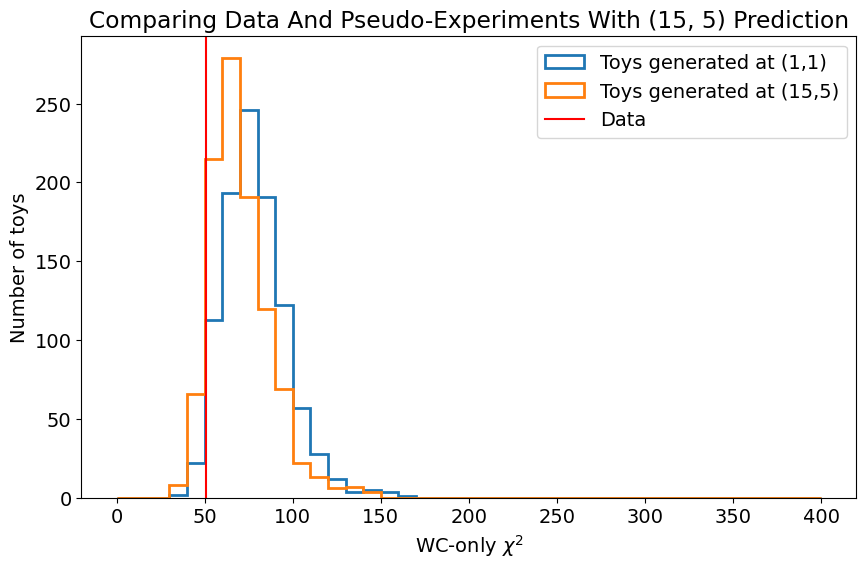

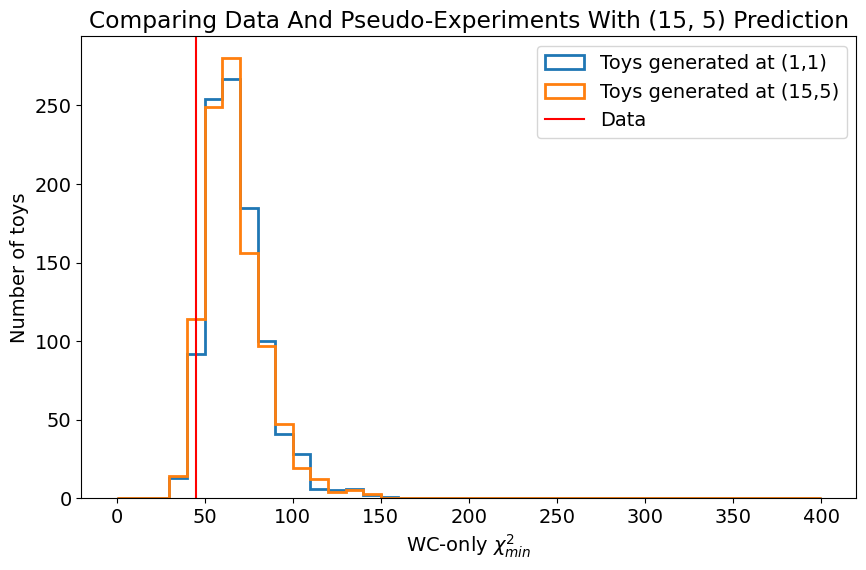

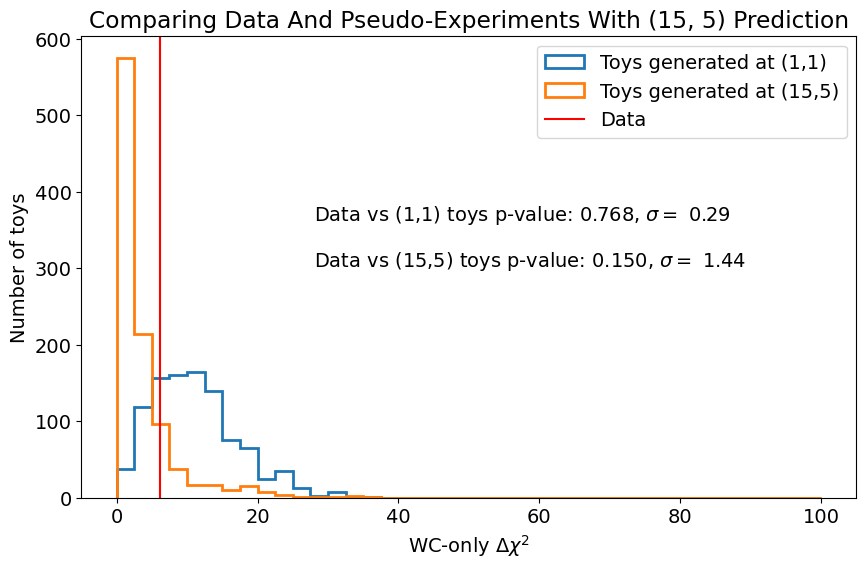

In [7]:
bins = np.linspace(0, 400, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{min}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 100, 41)

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_dchi2_value, color='r', label='Data')

plt.text(0.3, 0.6, rf"Data vs (1,1) toys p-value: {data_1_1_dchi2_pval:.3f}, $\sigma=$ {get_significance(data_1_1_dchi2_pval):.2f}", transform=plt.gca().transAxes)
plt.text(0.3, 0.5, f"Data vs (15,5) toys p-value: {data_15_5_dchi2_pval:.3f}, $\sigma=$ {get_significance(data_15_5_dchi2_pval):.2f}", transform=plt.gca().transAxes)

plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()


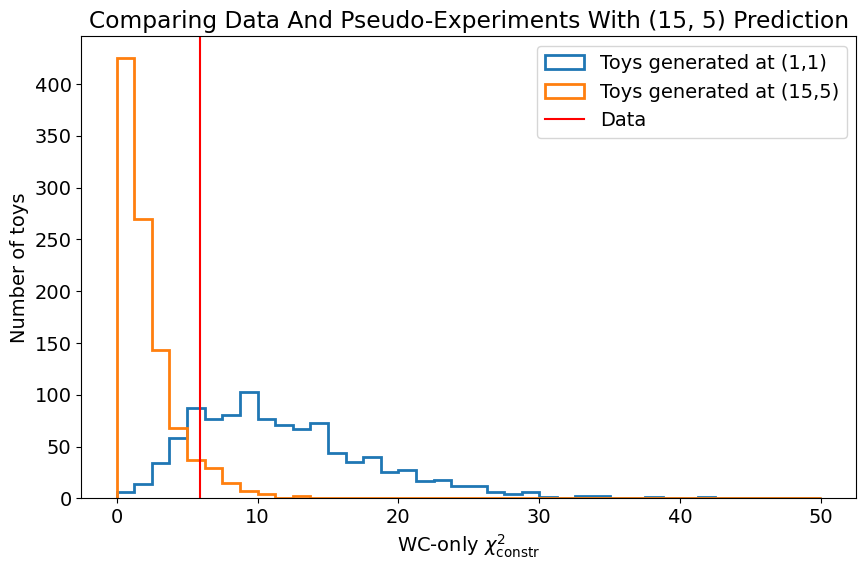

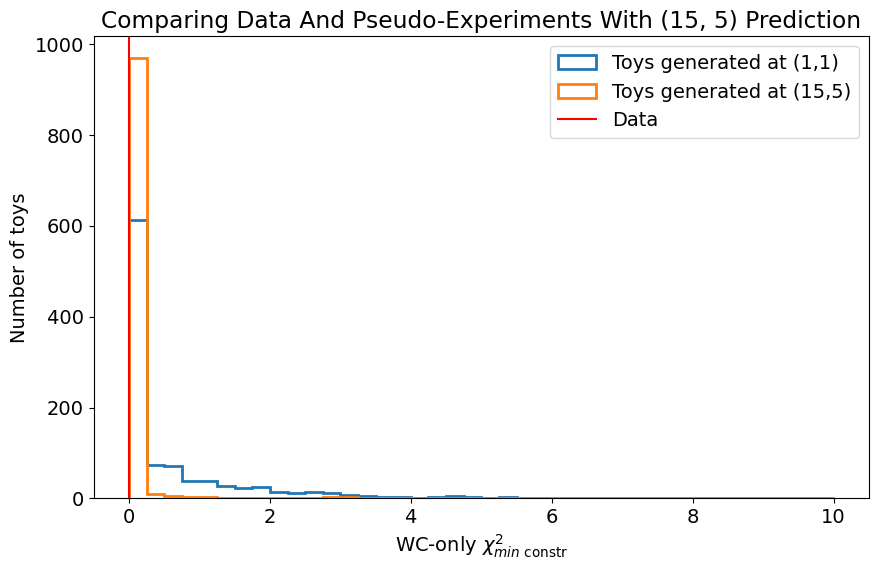

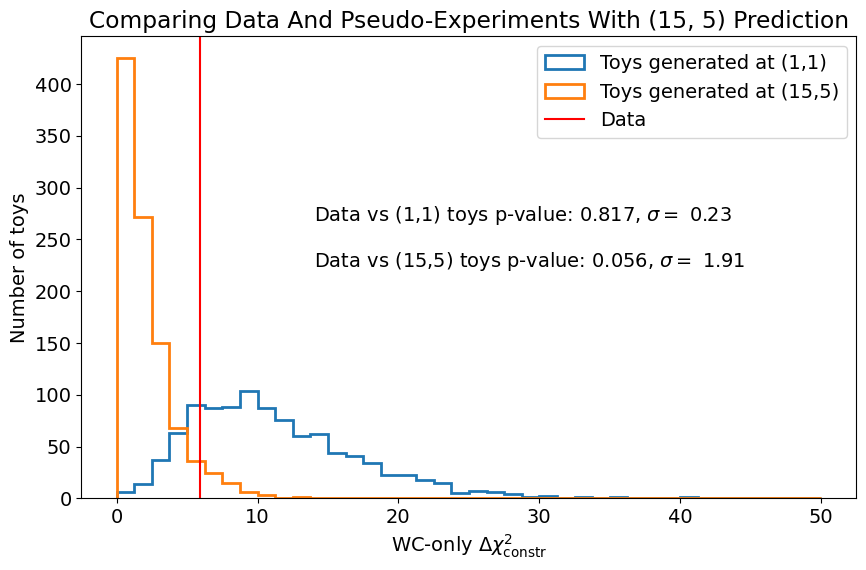

In [8]:
bins = np.linspace(0, 50, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_\mathrm{constr}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 10, 41)

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{min\ \mathrm{constr}}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 50, 41)

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_dchi2_value, color='r', label='Data')

plt.text(0.3, 0.6, rf"Data vs (1,1) toys p-value: {constr_data_1_1_dchi2_pval:.3f}, $\sigma=$ {get_significance(constr_data_1_1_dchi2_pval):.2f}", transform=plt.gca().transAxes)
plt.text(0.3, 0.5, f"Data vs (15,5) toys p-value: {constr_data_15_5_dchi2_pval:.3f}, $\sigma=$ {get_significance(constr_data_15_5_dchi2_pval):.2f}", transform=plt.gca().transAxes)

plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2_\mathrm{constr}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()
